## Problem 1: Line plots

In [84]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [85]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors

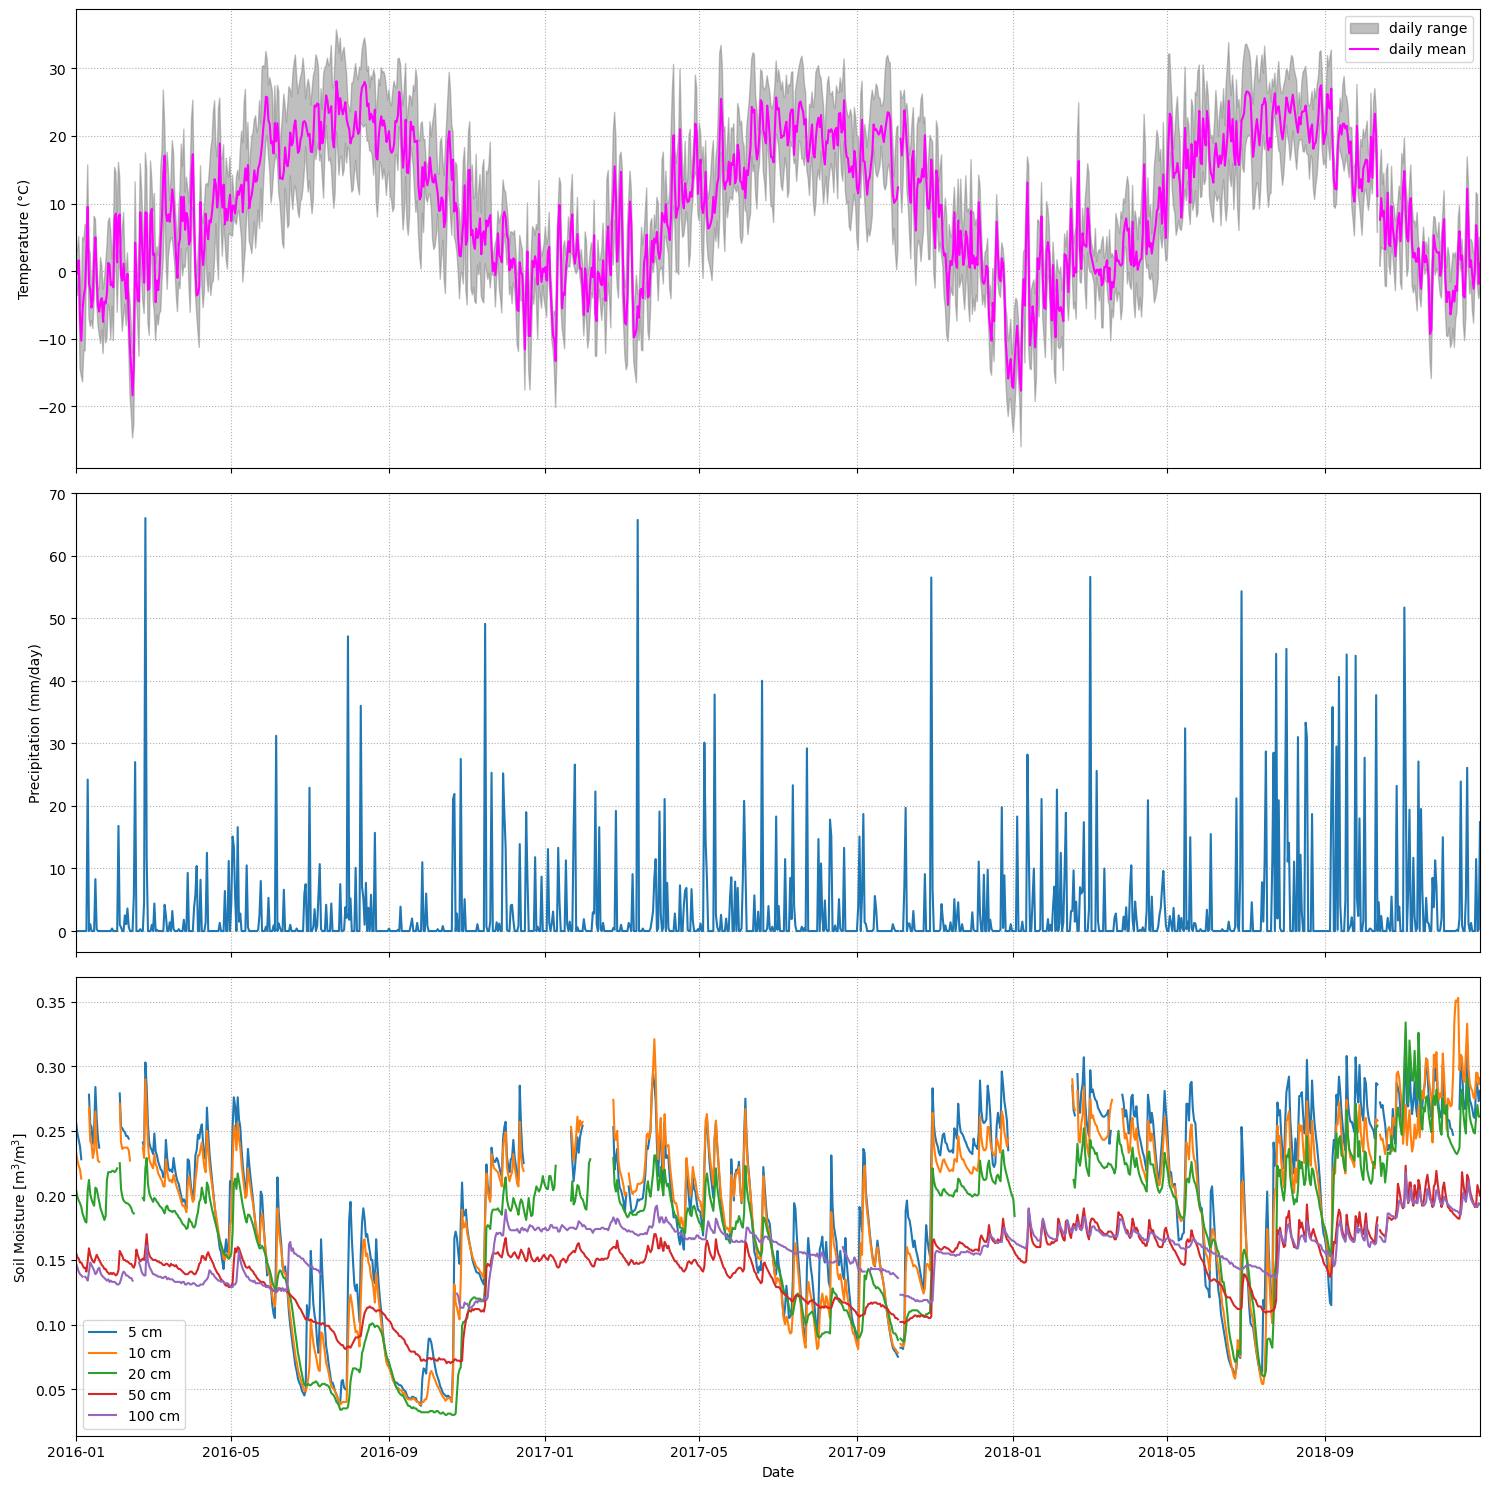

In [91]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

# Temperature
ax1.fill_between(date, t_daily_min, t_daily_max, color='gray', alpha=0.5, label='daily range')
ax1.plot(date, t_daily_mean, color='magenta', label='daily mean')
ax1.legend(loc='upper right')
ax1.set_ylabel('Temperature (°C)')
ax1.grid(linestyle = 'dotted')

# Precipitation
ax2.plot(date, p_daily_calc)
ax2.set_ylabel('Precipitation (mm/day)')
ax2.set_yticks(np.arange(0,71,10))
ax2.grid(linestyle = 'dotted')

# Soil Moisture
ax3.plot(date, soil_moisture_5, label='5 cm')
ax3.plot(date, soil_moisture_10, label='10 cm')
ax3.plot(date, soil_moisture_20, label='20 cm')
ax3.plot(date, soil_moisture_50, label='50 cm')
ax3.plot(date, soil_moisture_100, label='100 cm')
ax3.legend(loc='lower left')
ax3.set_ylabel('Soil Moisture [m$^{3}$/m$^{3}$]')
ax3.set_xlabel('Date')
ax3.set_xlim(left=date[0],right=date[-1])
ax3.grid(linestyle = 'dotted')

plt.tight_layout()
plt.show()


## Problem 2: Contour Plots

In [92]:
import netCDF4
import pydap

In [93]:
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays) 
#### NO XARRAY ALLOWED!
#########################################################

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

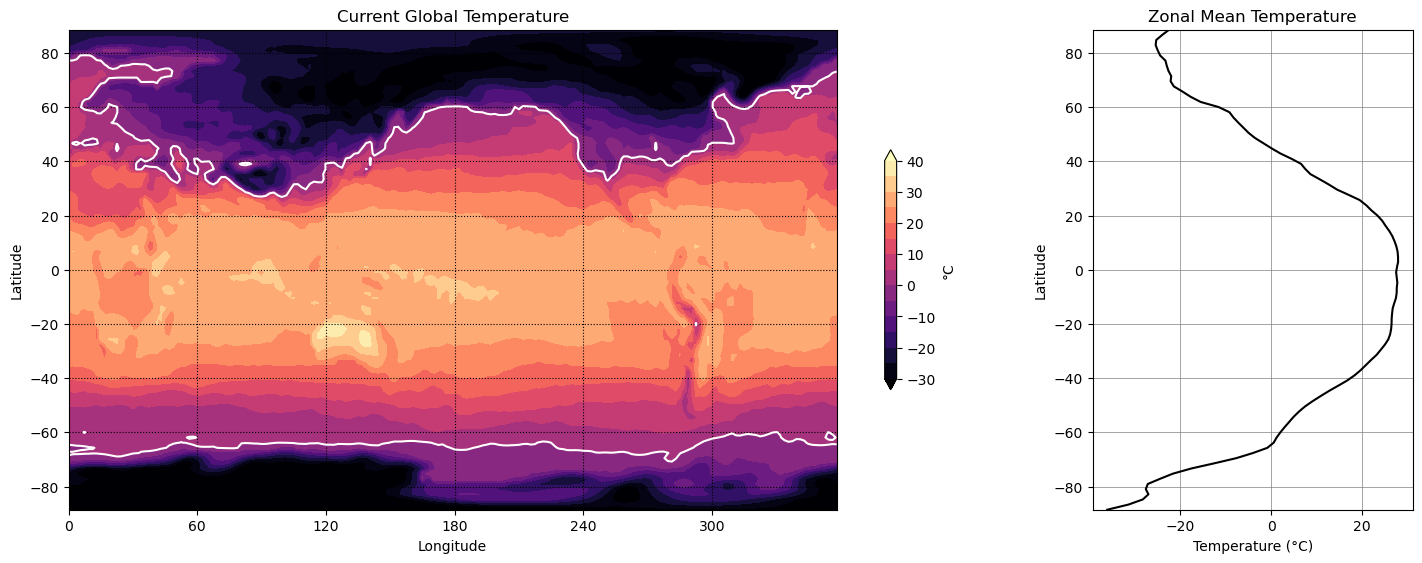

In [105]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1.5,1])
ax2 = fig.add_axes([1.6,0,0.5,1])

clevels = np.arange(-30,41,5)
temp_plot = ax1.contourf(lon, lat, temp, clevels, cmap='magma', extend = 'both')
contours = ax1.contour(lon,lat,temp,levels=0,colors='white')

ax1.set_title('Current Global Temperature')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_xticks(np.arange(min(lon), max(lon)+1, 60))
ax1.grid(linestyle='dotted', color='k')

cbar = fig.colorbar(temp_plot,shrink=0.5, ax=ax1)
cbar.set_label('°C')

zonal_mean_temp = np.mean(temp, axis=1)

ax2.plot(zonal_mean_temp, lat,'k-')
ax2.set_xlabel('Temperature (°C)')
ax2.set_ylabel('Latitude')
ax2.set_ylim(bottom=lat.min(),top=lat.max())
ax2.grid(linestyle = '-', color='gray',linewidth=0.5)
ax2.set_title('Zonal Mean Temperature')

plt.show()


## Problem 3: Scatter plots

In [106]:
fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

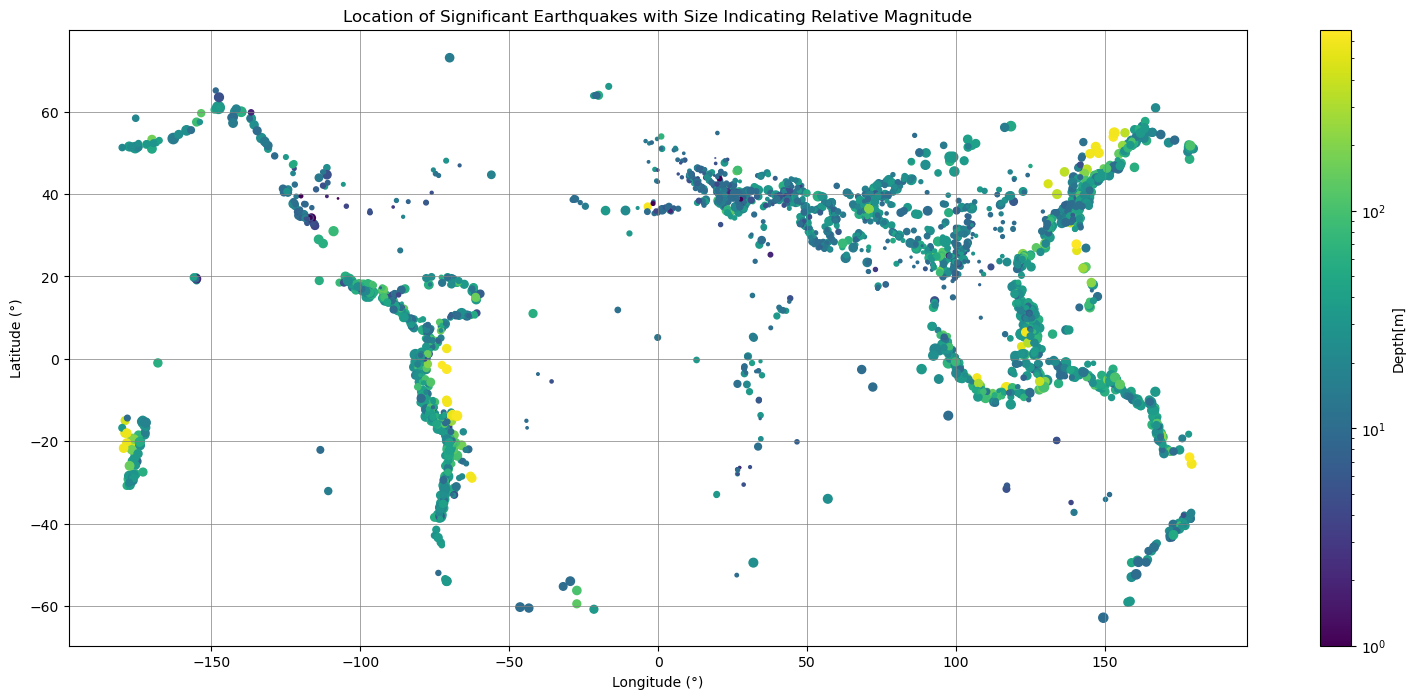

In [107]:
fig, ax = plt.subplots(figsize=(19,8))
splot = ax.scatter(longitude,latitude, c=depth, s= (magnitude**4)/100,norm=colors.LogNorm())
cbar = fig.colorbar(splot)
cbar.set_label('Depth[m]')

ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_title('Location of Significant Earthquakes with Size Indicating Relative Magnitude')
ax.grid(color='gray',linestyle='-',linewidth='0.5')